## 1. Defining Problem Statement and Analysing basic metrics
### Problem Statement
  ##### Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries


In [ ]:
#importing somerequired library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
df = pd.read_csv("netflix.csv")

In [ ]:
df.head()

## 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.describe(include =object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


## 3. Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
df['director'].nunique()

4528

In [ ]:
df['title'].nunique()

8807

In [ ]:
df.groupby(['director'])['title'].count().reset_index().sort_values(by=['title'],ascending=False)[:10]

,director,title
3392,Rajiv Chilaka,19
3443,"Raúl Campos, Jan Suter",18
4046,Suhas Kadav,16
2598,Marcus Raboy,16
1790,Jay Karas,14
685,Cathy Garcia-Molina,13
1787,Jay Chapman,12
4480,Youssef Chahine,12
2671,Martin Scorsese,12
4020,Steven Spielberg,11


#### netflix added most of movie which is directed by Rajiv Chilaka

In [ ]:
df.groupby(['listed_in'])['title'].count().reset_index().sort_values(by=['title'],ascending=False)[:10]

,listed_in,title
326,"Dramas, International Movies",362
274,Documentaries,359
470,Stand-Up Comedy,334
200,"Comedies, Dramas, International Movies",274
319,"Dramas, Independent Movies, International Movies",252
422,Kids' TV,220
121,Children & Family Movies,215
125,"Children & Family Movies, Comedies",201
281,"Documentaries, International Movies",186
329,"Dramas, International Movies, Romantic Movies",180


#### Drammas and comedy genre are very papular for movies and TV Show.


In [ ]:
df[df['type']=='TV Show'].groupby(['rating'])['title'].count().reset_index().sort_values(by=['title'],ascending=False)[:10]

,rating,title
4,TV-MA,1145
2,TV-14,733
5,TV-PG,323
7,TV-Y7,195
6,TV-Y,176
3,TV-G,94
0,NR,5
1,R,2
8,TV-Y7-FV,1


##### Most of the TV shows available to watch are rated as TV-MA

## 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

###  Let's handle nested data columns
#### We can ‘explode’ the values column, transforming each list-like to a separate row, by using explode().

*   https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#exploding-a-list-like-column




In [ ]:
df1 = df.assign(cast=df['cast'].str.split(',').to_list()).explode("cast")
df2 = df1.assign(director=df1['director'].str.split(',').to_list()).explode("director")
df3 = df2.assign(listed_in=df2['listed_in'].str.split(',').to_list()).explode("listed_in")
preprocessed_df = df3.assign(country=df3['country'].str.split(',').to_list()).explode("country")

In [ ]:
preprocessed_df.reset_index(drop=True, inplace=True)

In [ ]:
preprocessed_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
preprocessed_df['country'].nunique()

197

In [ ]:
preprocessed_df[preprocessed_df['country']=='India'].groupby(['director','cast'])['title'].count().reset_index().sort_values(by=['title'],ascending=False)[:10]

,director,cast,title
2119,David Dhawan,Anupam Kher,18
6503,Sooraj R. Barjatya,Alok Nath,15
6519,Sooraj R. Barjatya,Mohnish Bahl,12
6539,Sooraj R. Barjatya,Salman Khan,12
4727,Priyadarshan,Rajpal Yadav,11
6524,Sooraj R. Barjatya,Reema Lagoo,9
2135,David Dhawan,Karisma Kapoor,9
2158,David Dhawan,Shakti Kapoor,9
2372,Farah Khan,Shah Rukh Khan,9
6610,Subhash Ghai,Amrish Puri,9


### The most popular actor-director pair for movies across India are David Dhawan and Anupam Kher

In [ ]:
df_count = preprocessed_df.groupby(['country'])['title'].count().reset_index().sort_values(by=['title'])

In [ ]:
df_count.head(10)

,country,title
102,Uganda,1
51,Kazakhstan,1
70,Nicaragua,1
75,Panama,2
1,Afghanistan,2
63,Mongolia,2
94,Sri Lanka,2
6,Armenia,2
136,Greece,2
74,Palestine,2


In [ ]:
len(df_count[df_count['title']<=100])/len(df_count)*100

53.299492385786806

#### It is estimated that more than half of country data (movies or TV shows) are available very less on Netflix.

## 4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

In [ ]:
preprocessed_df['date_added'] = pd.to_datetime(preprocessed_df['date_added']) # Convert object data type to date time object


In [ ]:
preprocessed_df['date_added_year']  = preprocessed_df['date_added'].dt.year
preprocessed_df['date_added_month'] = preprocessed_df['date_added'].dt.month


In [ ]:
df_movie_added_year = preprocessed_df.groupby('date_added_year')['title'].count().reset_index()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

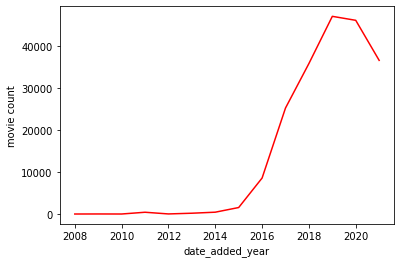

In [ ]:
sns.lineplot(data = df_movie_added_year , x='date_added_year',y='title',color='red')
plt.ylabel("movie count")
plt.show()

#### From year 2019 afterwards, the number of movies being added on Netflix start dropping drastically.

In [ ]:
df_movie_added_month = preprocessed_df[(preprocessed_df['date_added_year']==2021.0) | (preprocessed_df['date_added_year']==2020.0)].groupby('date_added_month')['title'].count().reset_index()

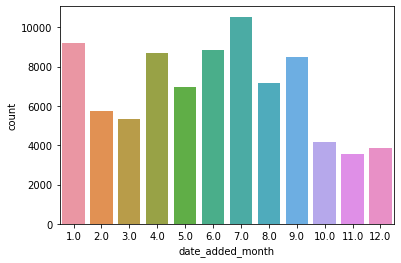

In [ ]:
sns.barplot(data =df_movie_added_month,x="date_added_month",y='title' )
plt.ylabel("count")
plt.show()

#### As we can see from above bar graph, netflix added most of movie or TV Show on month of July and january

In [ ]:
preprocessed_df.dropna(subset=['duration'],inplace=True)
preprocessed_df['duration'].isnull().sum()

0

In [ ]:
preprocessed_df['duration'] = preprocessed_df['duration'].str.split().apply(lambda x: int(x[0]))

In [ ]:
bins = [50, 80, 100,120,150]
labels = ['50-80', '80-100', '100-120','120-150']
preprocessed_df['movie_bins'] = pd.cut(x = preprocessed_df['duration'], bins = bins, labels = labels, include_lowest = True)

In [ ]:
df_watching_duration = preprocessed_df.groupby('movie_bins')['title'].count().reset_index()

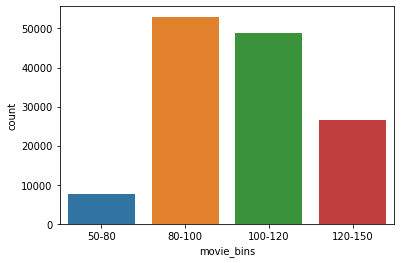

In [ ]:
sns.barplot(data =df_watching_duration,x="movie_bins",y='title' )
plt.ylabel("count")
plt.show()

#### The duration of most of the movies present on Netflix is between 80-100


In [ ]:
preprocessed_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_year', 'date_added_month', 'movie_bins'],
      dtype='object')

In [ ]:
df_TV_movie = preprocessed_df.groupby(['type','date_added_year'])['title'].count().reset_index()

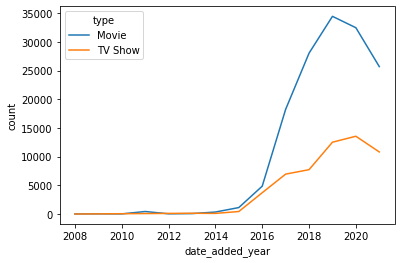

In [ ]:
sns.lineplot(data=df_TV_movie,x='date_added_year',y='title',hue='type')
plt.ylabel("count")
plt.show()

#### As we can seen from line graph, Number of movie is higher than compare to TV Show

### 4.2 For categorical variable(s): Boxplot (10 Points)

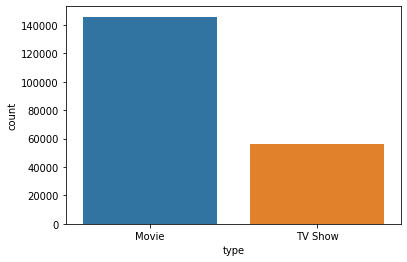

In [ ]:
sns.countplot(x =preprocessed_df['type'])
plt.show()

In [ ]:
df_TV = preprocessed_df[preprocessed_df['type']=='TV Show']
df_Movie = preprocessed_df[preprocessed_df['type']=='Movie']


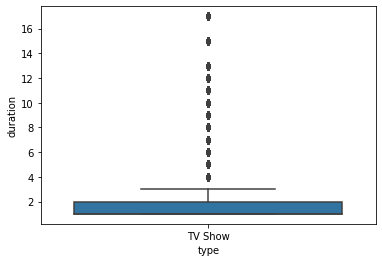

In [ ]:

sns.boxplot(data = df_TV,x = 'type', y='duration')
plt.show()

#### The mean duration of TV show is approx. 2 seasions, There some outlire have more number of seasons

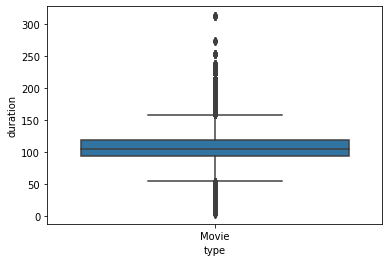

In [ ]:
sns.boxplot(data = df_Movie,x = 'type', y='duration')
plt.show()

#### The mean duration of Movie is approx. 100 min, There are 2-3 movie more 250 min duration

In [ ]:
preprocessed_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,date_added_month,movie_bins
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,80-100
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,NaN
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,NaN
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,NaN
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,NaN


In [ ]:
df_g = preprocessed_df.groupby(['type','rating'])['title'].count().reset_index()

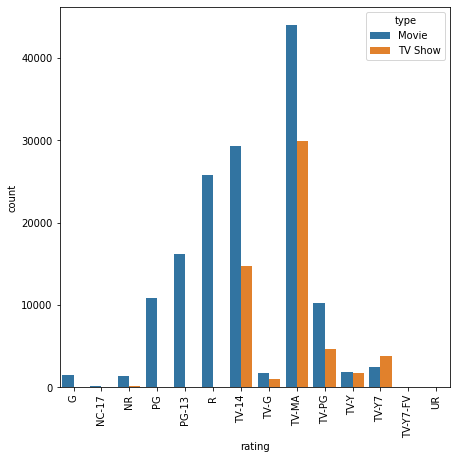

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(data=df_g,x='rating',y='title',hue='type')
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

#### Most of the TV shows or Movie available on netflix to watch are rated as TV-MA

### 4.3 For correlation: Heatmaps, Pairplots (10 Points)

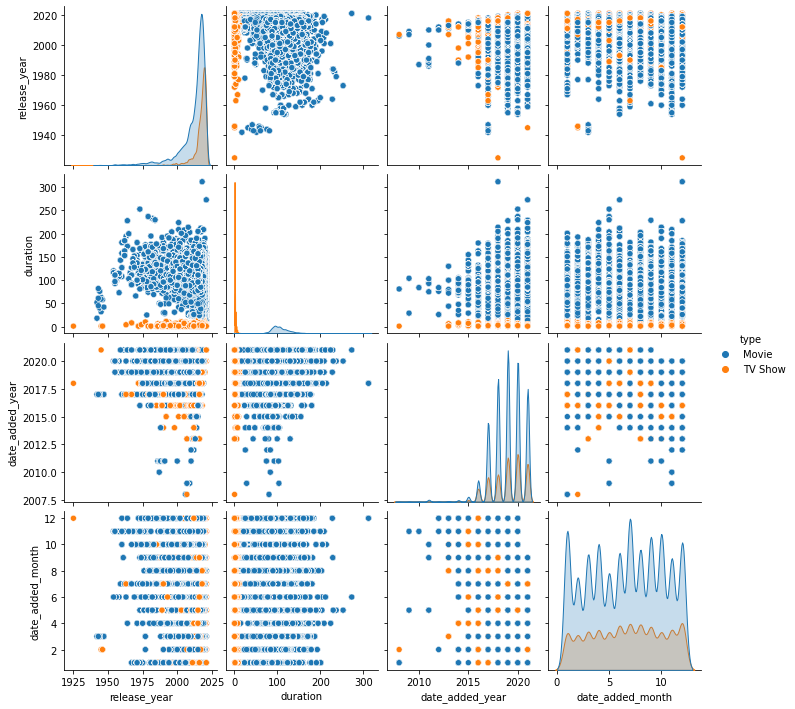

In [ ]:
sns.pairplot(data = preprocessed_df, hue= 'type')
plt.show()

From the paire plot, we can see blue and orange dots group together in year of 2020 and 2021,  It means releaseed year of movies and added year movies in netflix is same

In [ ]:
preprocessed_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_year', 'date_added_month', 'movie_bins'],
      dtype='object')

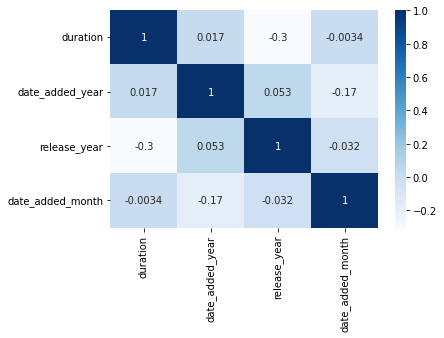

In [ ]:
sns.heatmap(preprocessed_df[['duration','date_added_year','release_year','date_added_month']].corr(), cmap= "Blues", annot=True)
plt.show()

From heatmap correlation matrix, we found some correlation between date_added_year and date_release year, It may happen becasue movie as soon as release netflix added on their database.

### 5. Missing Value & Outlier check (Treatment optional) (10 Points)

In [ ]:
preprocessed_df.isnull().sum()

show_id                 0
type                    0
title                   0
director            50643
cast                 2149
country             11897
date_added            158
release_year            0
rating                 67
duration                0
listed_in               0
description             0
date_added_year       158
date_added_month      158
movie_bins          65923
dtype: int64

### As we can see, columns [director, cast, country, date_added, rating having missing values]
#### Impute NaN value for country column
* Impute contry column based on genres(listed_in), find the mode value of country name corrospoding to each category of genres(listed_in)  and impute country column.

In [ ]:
df_impute_mis_value = preprocessed_df[preprocessed_df['listed_in']=='Dramas']
df_impute_mis_value['country'] = df_impute_mis_value['country'].fillna(preprocessed_df['country'][preprocessed_df['listed_in']=='Dramas'].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for i in preprocessed_df['listed_in'].unique():
  if i == 'Dramas':
    continue
  val = preprocessed_df['country'][preprocessed_df['listed_in']==i].mode()[0]
  df_new = preprocessed_df[preprocessed_df['listed_in']==i]
  # print(df_new.shape)
  df_new['country'] = df_new['country'].fillna(val)
  # print(df_impute_mis_value.shape)
  # print(df_new.shape)
  df_impute_mis_value= pd.concat([df_impute_mis_value,df_new])
  # print(df5.shape)
  # print("****************************")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df_impute_mis_value['country'].isnull().sum()

0

### Impute NaN value for director column

Find frequent directors based on country and genres (listed_in), go to each country and in that country go to corresponding genres (listed_in) and impute director names within that genre.

Ex: Country = "United States" ---> listed_in(genre) = "Dramas" --> find the frequent director on dramas category and update director name those cotegory corropoding to united states(country).

In [ ]:
df_impute_mis_value.isnull().sum()

show_id                 0
type                    0
title                   0
director            50643
cast                 2149
country                 0
date_added            158
release_year            0
rating                 67
duration                0
listed_in               0
description             0
date_added_year       158
date_added_month      158
movie_bins          65923
dtype: int64

In [ ]:
df_impute_director = df_impute_mis_value.loc[df_impute_mis_value['country']=='United States']
val = df_impute_mis_value['director'][df_impute_mis_value['country']=='United States'].mode()[0]
df_impute_director['director'] = df_impute_director['director'].fillna(val)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def fnv(x):
  return x.strip()
df_impute_mis_value['country'] = df_impute_mis_value['country'].apply(fnv) # remove left or right space from each country

In [ ]:
for each_country in df_impute_mis_value['country'].unique():
  df_new = df_impute_mis_value.loc[df_impute_mis_value['country']==each_country]
  try:
      val = df_impute_mis_value['director'][df_impute_mis_value['country']==each_country].mode()[0]
      df_new['director'] = df_new['director'].fillna(val)
      df_impute_director = pd.concat([df_impute_director,df_new])
  except Exception as e:
    print(e)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0
0
0
0
0


In [ ]:
df_impute_director.isnull().sum()

show_id                 0
type                    0
title                   0
director                0
cast                 2985
country                 0
date_added            243
release_year            0
rating                 69
duration                0
listed_in               0
description             0
date_added_year       243
date_added_month      243
movie_bins          82927
dtype: int64

In [ ]:
df_impute_mis_value.dropna(subset=['cast'],inplace=True)
df_impute_mis_value.dropna(subset=['rating'],inplace=True)
df_impute_mis_value.dropna(subset=['date_added_month'],inplace=True)
df_impute_mis_value.dropna(subset=['date_added_year'],inplace=True)

### Cast, rating date_added column have very less NaN value, So just drop that rows, There is no harm to drop these rows

In [ ]:
df_impute_mis_value.drop({'movie_bins','date_added','description'}, axis=1, inplace=True) # remove unnecessary columns

### 6. Insights based on Non-Graphical and Visual Analysis (10 Points)

#### 6.1 Comments on the range of attributes
* Refer section 3
** Netflix start added movie into their data from 2008.
** Content of Movies or TV shows are avaible across 197 coutry where 8807 movies directed by 4528 directors.
** Drammas and comedy genre are very papular for movies and TV Show.
** Most of the TV shows available to watch are rated as TV-MA


#### 6.2 Comments on the distribution of the variables and relationship between them
* Refer section 4.3
** From the paire plot, we can see blue and orange dots group together in year of 2020 and 2021,  It means releaseed year of movies and added year movies in netflix is same
** From heatmap correlation matrix, we found some correlation between date_added_year and date_release year, It may happen becasue movie as soon as release netflix added on their database.

#### 6.3 Comments for each univariate and bivariate plot
* Refer section 4.1:
** From year 2019 afterwards, the number of movies being added on Netflix start dropping drastically.
** As we can see from bar graph, Netflix added most of movie or TV Show on month of July and january
** The duration of most of the movies present on Netflix is between 80-100
** As we can seen from line graph, Number of movie is higher than compare to TV Show
* Refer section 4.2
** From boxplot, The mean duration of TV show is approx. 2 seasions, There some outlire have more number of seasons
** The mean duration of Movie is approx. 100 min, There are 2-3 movie more 250 min duration
** Most of the TV shows or Movie available on netflix to watch are rated as TV-MA

#### 7. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it
* It is obseved that more than half of country data (movies or TV shows) are available very less on Netflix.
* Movie or TV Show not uniform distribution uniformly.
* We found correlation between added years and release year uisng heatmap correlation plot.
* Netflix added most of movie or TV Show on month of July and january.
* Drammas and comedy genre are very papular for movies and TV Show.
* Most of the TV shows available to watch are rated as TV-MA

#### 8. Recommendations (10 Points)
* More than 50% of country of data (Movies or TV Shows) avaible on netflix is very less. Netflix need to add more content with respect to country where distribution of moive or shows are less. Therefore, They may increase their audians.   
* Now a days, TV shows are Treding to watch by audians, From the analysis we got number movie is higher than compare to TV show(TV series). To increase the membership on netflix, They may add more TV series.

* We need to increase correlation between added years and release year, So people are come on netflix to watch movie/TV show instead of Other place

* Most of TVshow or Movie avaible on netflix under TV-MA rating, Netflix need to add more content that is suitable for all audiences like under TV-G rating.


